Author: Ashish Toppo  
**Type      :NLP**  
**Algorithm :Naive Bayes**  
**Language  :Python**  
**IDE       :Jupyter Notebook**  

Description:
Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. For example, a fruit may be considered to be an apple if it is red, round, and about 3 inches in diameter. It's based on bayes theorem.  

## Work Done:  
1. Cleaned the text:
1.1 Removed the Punctuations using regex.
1.2 Removed the stop words.
1.3 Rooted the words using lemmatization
2. Converted the text data to both bag of words data and tfidf data.
3. Done hyperparameter tuning using GridSearchCv for both bow and tfidf data.
4. Confusion matrix and ROC-AUC curve for validation.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading up the .csv file
data = pd.read_csv("spam_ham_dataset.csv")

In [3]:
#peeping into data
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
#what to expect 
for i in data["text"].sample(5):
    print(i)
    print("***"*20)

Subject: hpl nom for march 3 - 5 , 2001
( see attached file : hplno 303 . xls )
- hplno 303 . xls
************************************************************
Subject: valentines day help
red - neck valentine ' s love poem
collards is green
my dog ' s name is blue
and i ' m so lucky
to have a sweet thang like you .
yore hair is like cornsilk
a - flapping in the breeze
softer than old blue ' s
and without all them fleas .
you move like the bass ,
which excite me in may .
you ain ' t got no scales
but i luv you anyway .
yo ' re as satisfy ' n as okry
jist a - fry ' n in the pan .
yo ' re as fragrant as " snuff "
right out of the can .
you have som ' a yore teeth ,
for which i am proud ;
i hold my head high
when we ' re in a crowd .
on special occasions ,
when you shave under yore arms ,
well , i ' m in hawg heaven ,
and awed by yore charms .
still them fellers at work ,
they all want to know ,
what i did to deserve
such a purdy , young doe .
like a good roll of duct tape
yo ' re there fe

**Observations**
1. The mails have phone no's, hyperlinks, email addresses, punctuations
2. But as these might increase my no. of words in corpus i'll be getting rid of these using **Regular Expressions**.
3. Numbers Won't be of any help so i'll be rooting up for the words.

In [5]:
data.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [6]:
#dropping Columns Unnames and label as we have similar columns for them
data.drop(columns=['Unnamed: 0', 'label'], inplace=True)

In [7]:
data.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [8]:
# regular experession
data["Rtext"]=data["text"].replace("[^a-zA-Z]"," ", regex=True)

In [9]:
data.head()

,text,label_num,Rtext
0,Subject: enron methanol ; meter # : 988291\r\n...,0,Subject enron methanol meter th...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,Subject hpl nom for january see a...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,Subject neon retreat ho ho ho we re arou...
3,"Subject: photoshop , windows , office . cheap ...",1,Subject photoshop windows office cheap ...
4,Subject: re : indian springs\r\nthis deal is t...,0,Subject re indian springs this deal is to ...


In [10]:
#data after removal of punctuations
data.iloc[0][2]

'Subject  enron methanol   meter             this is a follow up to the note i gave you on monday                preliminary  flow data provided by daren      please override pop   s daily volume   presently zero   to reflect daily  activity you can obtain from gas control    this change is needed asap for economics purposes  '

In [11]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

In [12]:
list(stop_words)[:10]

['y',
 "weren't",
 "wouldn't",
 'the',
 'hasn',
 'so',
 'can',
 "mightn't",
 'why',
 'more']

In [13]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

In [14]:
#this code below removes stop words and also lemmatizes the words
for i in range(len(data)):
    review=data["Rtext"][i]
    review=review.split()
    review=[wnl.lemmatize(word) for word in review if word not in stop_words]
    review=" ".join(review)
    data["Rtext"][i]=review

In [15]:
#data after removal of stop words and lemmatizing
data.iloc[0][2]

'Subject enron methanol meter follow note gave monday preliminary flow data provided daren please override pop daily volume presently zero reflect daily activity obtain gas control change needed asap economics purpose'

In [16]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(data["Rtext"],data["label_num"],test_size=.3)

In [18]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3619,) (1552,) (3619,) (1552,)


In [19]:
# bag of words data
count = CountVectorizer()
count.fit(X_train)
bow_train = count.transform(X_train).toarray()
bow_test = count.transform(X_test).toarray()

In [20]:
bow_train = pd.DataFrame(bow_train,columns=count.get_feature_names())
bow_test = pd.DataFrame(bow_test,columns=count.get_feature_names())

In [21]:
bow_train.shape

(3619, 36138)

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_score, recall_score

In [23]:
#Hyperparameter tuning for bag of word data
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(MultinomialNB(),{
    "alpha":np.linspace(0,1,11)
}, cv=5)

In [24]:
clf.fit(bow_train,y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [25]:
clf.best_params_

{'alpha': 0.1}

accuracy:0.9780927835051546, recall: 0.9556962025316456, precision 0.9721030042918455


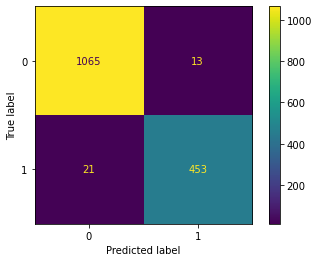

In [26]:
model1 = MultinomialNB(alpha=clf.best_params_["alpha"])
model1.fit(bow_train,y_train)
pred1 = model1.predict(bow_test)
predprob1 = model1.predict_proba(bow_test)
print(f"accuracy:{accuracy_score(y_test,pred1)}, recall: {recall_score(y_test,pred1)}, precision {precision_score(y_test,pred1)}")
cm1 = confusion_matrix(y_test,pred1)
disp1 = ConfusionMatrixDisplay(cm1,display_labels=model1.classes_)
disp1.plot()
plt.show()

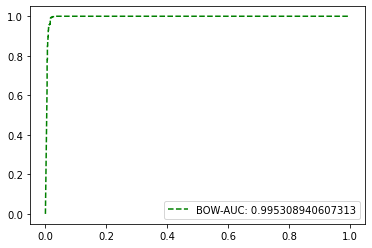

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr,tpr,_=roc_curve(y_test,predprob1[:,1])
plt.plot(fpr,tpr,"--",color="green", label=f"BOW-AUC: {roc_auc_score(y_test,predprob1[:,1])}")
plt.legend()
plt.show()

In [28]:
# tfidf data
tfidf = TfidfVectorizer()
tfidf.fit(X_train)
tfidf_train = tfidf.transform(X_train).toarray()
tfidf_test = tfidf.transform(X_test).toarray()

In [29]:
tfidf_train = pd.DataFrame(tfidf_train,columns=tfidf.get_feature_names())
tfidf_test = pd.DataFrame(tfidf_test,columns=tfidf.get_feature_names())

In [30]:
tfidf_train.shape

(3619, 36138)

In [31]:
#Hyperparameter tuning for tfidf data
clf.fit(tfidf_train,y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [32]:
clf.best_params_

{'alpha': 0.1}

accuracy:0.976159793814433, recall: 0.9345991561181435, precision 0.9866369710467706


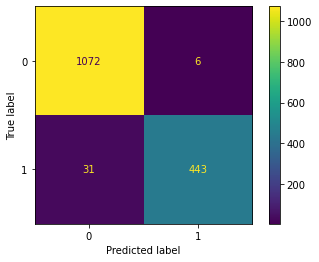

In [33]:
model2 = MultinomialNB(alpha=clf.best_params_["alpha"])
model2.fit(tfidf_train,y_train)
pred2 = model2.predict(tfidf_test)
predprob2 = model1.predict_proba(tfidf_test)
cm2 = confusion_matrix(y_test,pred2)
print(f"accuracy:{accuracy_score(y_test,pred2)}, recall: {recall_score(y_test,pred2)}, precision {precision_score(y_test,pred2)}")
disp2 = ConfusionMatrixDisplay(cm2,display_labels=model2.classes_)
disp2.plot()
plt.show()

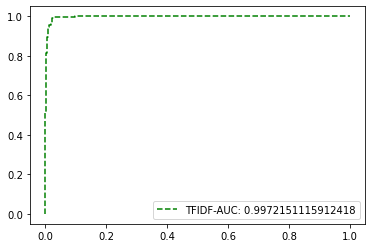

In [34]:
fpr,tpr,_=roc_curve(y_test,predprob2[:,1])
plt.plot(fpr,tpr,"--",color="green", label=f"TFIDF-AUC: {roc_auc_score(y_test,predprob2[:,1])}")
plt.legend()
plt.show()